<a href="https://colab.research.google.com/github/Devscoding/MAT421/blob/main/ModuleD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.1 Introduction to Linear Algebra**
Linear Algebra is one of the main fundamental fields of mathematics that's application is crucial in areas such as data science and machine learning.

In the next sections we will introduce many other topics that further expand upon our knowledge in said previously mentioned areas

# **1.2 Linear Spaces**
We define a **Linear Combination** as vector contructed from a subset by mutiplying each vector by some constant and then adding all of the results, we further define a **linear subspace** as a result of said linear combination

The **Span** of a set of vectors can be viewed as the set of all possible linear combinations. It also a linear subspace in particular the subspace of a vector space that those linear combinations can generate

If the matrix A exist the the **Column Space** of matrix A is referred to as the span of the columns of A

A set of vectors can achieve what is known as **Linear Independence** if no vector in the set can be expressed as a linear combination of the other vectors in the set, i.e. $c_1v_1 + c_2v_2 + c_3v3 + ..... + c_nv_n = 0$ when all $c_n$'s are $0$.

In [10]:
import numpy as np

# Defining our vectors
v1 = np.array([1, 0])
v2 = np.array([0, 1])
v3 = np.array([1, 1])

# Linear Combination
c1, c2, c3 = 3, 5, 2
linear_combination = c1 * v1 + c2 * v2 + c3 * v3
print("Linear Combination:", linear_combination)

# Span
matrix = np.array([v1, v2, v3]).T
span = np.linalg.matrix_rank(matrix)
print("Dimension of the span of vectors:", span)

# Column Space
A = np.array([[1, 2], [3, 4]])
column_space = np.linalg.matrix_rank(A)
print("Dimension of column space of A:", column_space)

# Linear Independence
rank = np.linalg.matrix_rank(matrix)
if rank == len(matrix[0]):
    print("Vectors are linearly independent")
else:
    print("Vectors are linearly dependent")

Linear Combination: [5 7]
Dimension of the span of vectors: 2
Dimension of column space of A: 2
Vectors are linearly dependent


We can define that two vectors are said to be **Orthogonal** if the result of their dot product is $0$, or in other words the two vectors are perpendicular to one another.

A set of vetors is known as **Orthonormal** if each each vector in the set of vectors is orthogonal to the rest and that each has length that is the unit length (norm of 1)

In [13]:
# Checking if vectors are orthogonal

# Defining two vectors
v1 = np.array([2, 4])
v2 = np.array([3, 5])

# Dot product to heck orthogonality
dot_product = np.dot(v1, v2)
if dot_product == 0:
    print("v1 and v2 are orthogonal")
else:
    print("v1 and v2 are not orthogonal")


v1 and v2 are not orthogonal


When working with transformations or data science in general eigenvalues can be very useful in their applications

An **Eigenvector** is a non-zero vector($x$) that when mutiplied by a square matrix($A$) results in a scalar multiple of itself: $Ax = λx$ where here $x$ is our eigen vector.

The scalar $λ$ in our expression is known as the **Eigenvalue** that is associated with our eigenvector $x$.

In practical application, we say that eigenvalues are the directions in which a linear transformation (in this case defined by a matrix $A$) expands or compresses. Whereas the eigenvalue of $λ$ refers to the factor of said expansion or compression.

In [14]:
# Square matrix A
A = np.array([[2, 5],
              [3, 4]])

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

print("Eigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvectors)

Eigenvalues:
[-1.  7.]

Eigenvectors:
[[-0.85749293 -0.70710678]
 [ 0.51449576 -0.70710678]]


# **1.3 Linear Regression**
When we are dealing with predictive models, one of the more popular methods involves **Linear Regression** which measures the relationship between the dependent variable and an independent variable (or multiple if performing multi-variable linear regression vs a simple regression). Where the goal is to find the best fitting straight line model that best predicts the dependent variable.

Simple regression formula: $y = mx + b$

Multiple variable regression formula: $y = b + c_1x_1 + c_2x_2 + c_3x_3 + ... + c_nx_n$

Linear regression focuses on minimizing the mean squared error (MSE) between the predicted values from our straight line model and the actual values.

Slope: 3.3078277261774525
Intercept: 1.5180433646330636


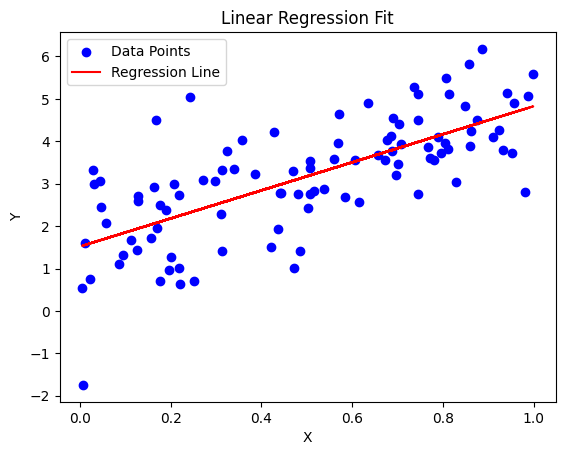

Mean Squared Error: 0.9688755142396931
R^2: 0.49890260764410665


In [30]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Creating random data to preform our regression on
np.random.seed(22)
# 100 random points between 0 and 1
X = 1 * np.random.rand(100, 1)
# y = 1 + 4x + noise
Y = 1 + 4 * X + np.random.randn(100, 1)

model = LinearRegression()
model.fit(X, Y)

# Finding the slope and intercept
slope = model.coef_[0][0]
intercept = model.intercept_[0]
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

Y_pred = model.predict(X)

# Plotting the regression line
plt.scatter(X, Y, color="blue", label="Data Points")
plt.plot(X, Y_pred, color="red", label="Regression Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

# Calculate MSE and R^2
mse = mean_squared_error(Y, Y_pred)
r2 = r2_score(Y, Y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2: {r2}")